In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm
# from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report
import joblib


In [2]:
df=pd.read_csv('./Training.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2455,3,126,88,41,235,39.3,0.704,27,0
2456,4,123,62,0,0,32.0,0.226,35,1
2457,1,80,74,11,60,30.0,0.527,22,0
2458,1,96,64,27,87,33.2,0.289,21,0


In [3]:
df.shape

(2460, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.corr().Outcome

Pregnancies                 0.218263
Glucose                     0.440045
BloodPressure               0.069604
SkinThickness               0.071114
Insulin                     0.109022
BMI                         0.308345
DiabetesPedigreeFunction    0.160543
Age                         0.217349
Outcome                     1.000000
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'outcome data distribution')

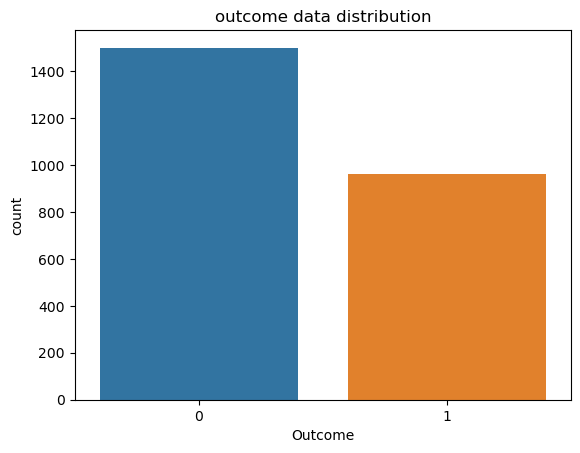

In [8]:
sns.countplot(x='Outcome',data=df)
plt.title("outcome data distribution")

Text(0.5, 1.0, 'Relation Between age and bmi')

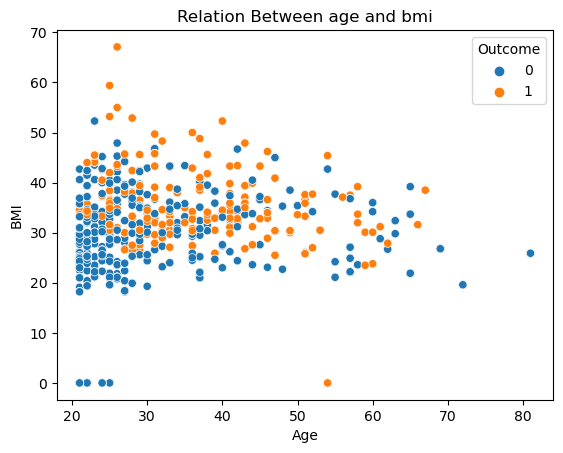

In [9]:
sns.scatterplot(x='Age',y='BMI',data=df,hue='Outcome')
plt.title("Relation Between age and bmi")

Text(0.5, 1.0, 'outliers detection')

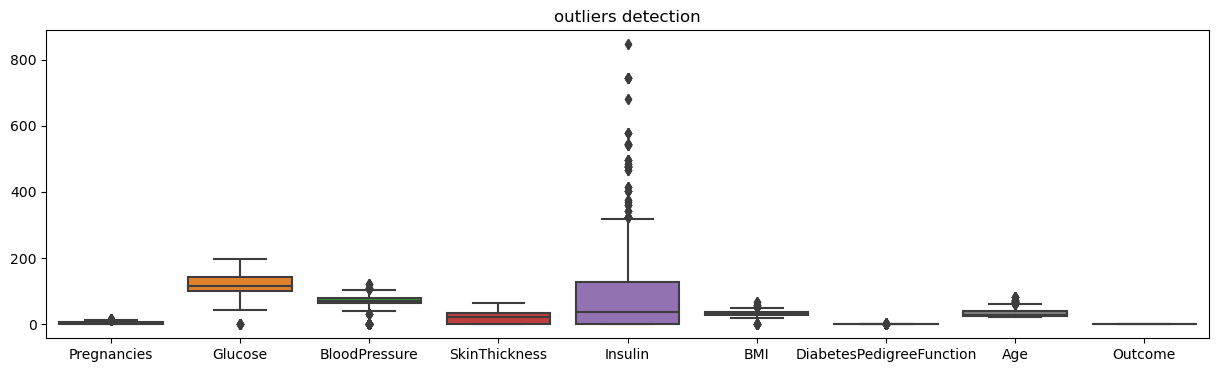

In [10]:
plt.figure(figsize=(15, 4))
sns.boxplot(df)
plt.title("outliers detection")

In [11]:
# Remove outliers from the 'Insulin' column using IQR method
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Define lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [13]:
# Remove outliers
df = df[(df['Insulin'] >= lower_bound) & (df['Insulin'] <= upper_bound)]

Text(0.5, 1.0, 'outliers detection')

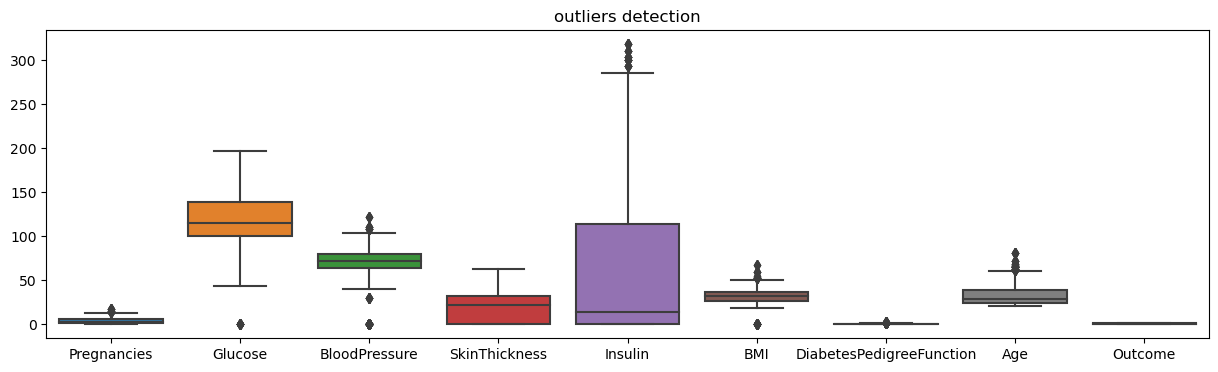

In [14]:
plt.figure(figsize=(15, 4))
sns.boxplot(df)
plt.title("outliers detection")

In [15]:
df.shape

(2363, 9)

In [16]:
# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [17]:
# Initialize StandardScaler
scaler = StandardScaler()

In [18]:
# Scale the features
X_scaled = scaler.fit_transform(X)

In [19]:
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': svm.SVC(kernel='poly'),
}

In [21]:
# Evaluate each model using cross-validation
for name, model in models.items():
    print("Model:", name)
    accuracies = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')
    precisions = cross_val_score(model, X_scaled, y, cv=skf, scoring='precision')
    recalls = cross_val_score(model, X_scaled, y, cv=skf, scoring='recall')
    
    # Calculate mean scores
    mean_accuracy = accuracies.mean()
    mean_precision = precisions.mean()
    mean_recall = recalls.mean()
    
    print("Mean Accuracy:", mean_accuracy)
    print("Mean Precision:", mean_precision)
    print("Mean Recall:", mean_recall)
    print("------------")

Model: Logistic Regression
Mean Accuracy: 0.7435365678861935
Mean Precision: 0.7115031437749885
Mean Recall: 0.5665715499969644
------------
Model: Random Forest
Mean Accuracy: 0.9978831475973771
Mean Precision: 0.9956462342599192
Mean Recall: 0.9989010989010989
------------
Model: Support Vector Machine
Mean Accuracy: 0.8091500340416383
Mean Precision: 0.9118348700431665
Mean Recall: 0.5588853135814462
------------


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,y, test_size = 0.2, stratify=y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(2363, 8) (1890, 8) (473, 8)


In [24]:
#initalize model
svc = svm.SVC(kernel='linear')

In [ ]:
#fit to model
svc.fit(X_train, Y_train)

In [26]:
# accuracy score on the training data
X_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7582010582010582


In [28]:
# accuracy score on the test data
X_test_prediction = svc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7632135306553911


In [30]:
# Save the trained Random Forest model to a file
joblib.dump(svc, 'SVC.pkl')

['SVC.pkl']

Testing Data

In [31]:
#load testing dataset
df_test=pd.read_csv('./Testing.csv')
df_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.8,0.733,48,0
1,1,71,62,0,0,21.8,0.416,26,0
2,8,74,70,40,49,35.3,0.705,39,0
3,5,88,78,30,0,27.6,0.258,37,0
4,10,115,98,0,0,24.0,1.022,34,0
...,...,...,...,...,...,...,...,...,...
303,10,101,76,48,180,32.9,0.171,63,0
304,2,122,70,27,0,36.8,0.340,27,0
305,5,121,72,23,112,26.2,0.245,30,0
306,1,126,60,0,0,30.1,0.349,47,1


In [32]:
# Separate features and target variable
X_test = df_test.drop('Outcome', axis=1)
y_test = df_test['Outcome']


In [33]:
# If you need to scale the features, use the same scaler as before
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)  # Scale the features

In [34]:
# Load the trained model
model = joblib.load("./SVC.pkl")

In [35]:
# Make predictions
predictions = model.predict(X_test_scaled)

In [36]:
# Evaluate the predictions
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7922077922077922
Precision: 0.6666666666666666
Recall: 0.6236559139784946


In [37]:
#make new pridiction

new=[[-0.84824791,  0.1932269 , -0.48676447, -1.27182264, -0.7307984 ,
       -0.2381367 , -0.32318234,  1.08868503]]
predictions = model.predict(new)

In [38]:
predictions

array([0], dtype=int64)